<a href="https://colab.research.google.com/github/jyeongvv/MachineLearning_jy/blob/main/jyeongvv/ch08_ML_03_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/akhil0007/wine-data
url = "https://github.com/BigData23th/Data/raw/main/wine.csv"
df = pd.read_csv(url)
df
# class - 예측값, 종속변수

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
df.describe()
# 1. 변수마다 값의 범위가 다름 -> 거리기반 (단위가 통일되어 있지 않으면 큰 값의 독립변수가 다른 변수의 영향을 상쇄시킴)
# => 단위를 비슷하게 만들어줘야함 => 스케일링(scaling) # scale(단위)
# 스케일링(scaling) : 독립변수의 범위를 동일한 수준으로 만들어주는 작업/기법
# 2. 이상치 (outlier) : 갑자기 폭증하거나 갑자기 줄어드는 그러한 '튀는 값' -> 왜곡

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


<Axes: xlabel='Color_Intensity', ylabel='Count'>

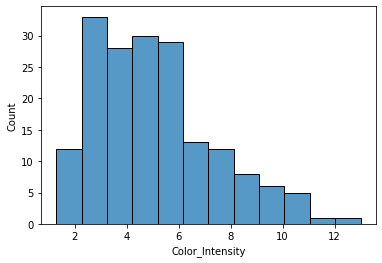

In [ ]:
sns.histplot(data=df, x='Color_Intensity')

In [ ]:
# 등급 -> Class
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

<Axes: ylabel='Class'>

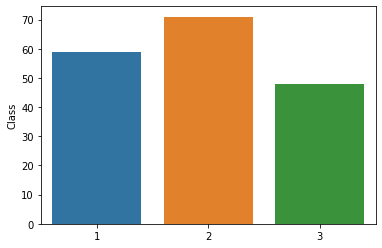

In [ ]:
vc = df.Class.value_counts()
sns.barplot(x = vc.index, y = vc)

# 전처리

### 스케일링
* 데이터의 스케일(Scale, 범위)을 맞추는 작업
* K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음
* 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드는 작업
* 데이터를 **동등한 수준**에서 연산하게 함

#### 스케일링 종류
|종류|설명
|-|-|
|표준화 스케일링 Standarad Scaling|평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용|
|로버스트 스케일링 Robust Scaling|데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용|
|최소-최대 스케일링 Min-Max Scaling|데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
|정규화 스케일링 Normalizer Scaling|행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

#### 표준화 스케일링
> 데이터를 표준정규분포 형태로 변형

$x_i-mean(x)\over sd(x)$

* $x_i$ : 변수의 i번째 값
* $mean(x)$ : 해당 변수의 평균
* $sd(x)$ : 해당 변수의 표준편차

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_scaler = StandardScaler()

In [ ]:
# df의 각 열의 평균과 표준편차 -> 학습
# 각 값에 표준화 스케일링의 공식을 적용
# df을 기준으로 표준화 스케일링을 진행하는 객체
st_scaler.fit(df)

StandardScaler()

In [ ]:
df. iloc[:, 1]

0     14.2300
1     13.2000
2     13.1600
3     14.3700
4     13.2400
        ...  
173   13.7100
174   13.4000
175   13.2700
176   13.1700
177   14.1300
Name: Alcohol, Length: 178, dtype: float64

In [ ]:
st_df = st_scaler.transform(df)
st_df

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
st_df[:, 1] # 모든 행의 첫번째 열들 (numpy 배열 인덱싱)

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

In [ ]:
st_df2 = pd.DataFrame(st_df, columns = df.columns)
st_df2

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.2139,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,-1.2139,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,-1.2139,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,-1.2139,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,-1.2139,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.3739,0.8763,2.9745,0.3052,0.3018,-0.3329,-0.9856,-1.4249,1.2743,-0.9302,1.1428,-1.3928,-1.2312,-0.0220
174,1.3739,0.4933,1.4126,0.4148,1.0525,0.1586,-0.7933,-1.2843,0.5491,-0.3170,0.9698,-1.1295,-1.4854,0.0099
175,1.3739,0.3328,1.7447,-0.3894,0.1517,1.4224,-1.1298,-1.3446,0.5491,-0.4221,2.2242,-1.6121,-1.4854,0.2806
176,1.3739,0.2092,0.2277,0.0127,0.1517,1.4224,-1.0337,-1.3546,1.3549,-0.2293,1.8349,-1.5683,-1.4007,0.2965


<Axes: xlabel='Color_Intensity', ylabel='Density'>

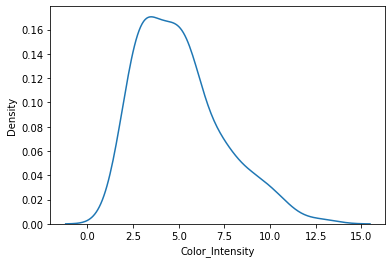

In [ ]:
sns.kdeplot(data=df, x='Color_Intensity')

<Axes: xlabel='Color_Intensity', ylabel='Density'>

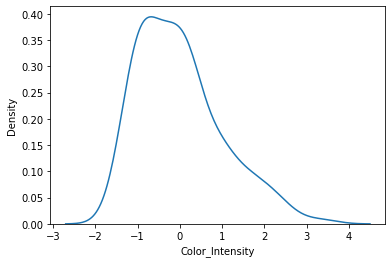

In [ ]:
sns.kdeplot(data=st_df2, x='Color_Intensity')

<Axes: xlabel='Hue', ylabel='Density'>

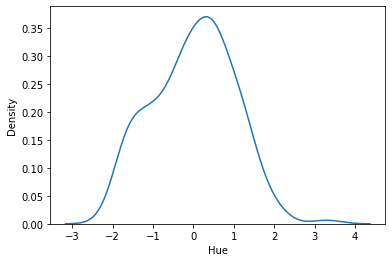

In [ ]:
sns.kdeplot(data=st_df2, x='Hue')

In [ ]:
st_df2.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-1.2139,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8682,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932
25%,-1.2139,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7401,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846
50%,0.0800,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1761,-0.0629,-0.1592,0.0331,0.2377,-0.2337
75%,1.3739,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6095,0.6292,0.4940,0.7132,0.7886,0.7582
max,1.3739,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4024,3.4851,3.4354,3.3017,1.9609,2.9715


#### 로버스트 스케일링
> 사분위값을 이용하여 계산

$x_i-Q_2(x)\over Q_3(x)-Q_1(x)$

* $x_i$ : 변수의 i번째 값
* $Q_1(x)$ : 25% 지점
* $Q_2(x)$ : 50% 지점 (변수의 중윗값)
* $Q_3(x)$ : 75% 지점

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rb_scaler = RobustScaler()

In [ ]:
# fit -> transform 
# fit_transform (scaler 객체 안에 fit한 정보는 유지)
rb_scaled = rb_scaler.fit_transform(df)
rb_scaled

array([[-0.5       ,  0.8973384 , -0.10472973, ...,  0.22222222,
         0.92494929,  0.80804954],
       [-0.5       ,  0.11406844, -0.05743243, ...,  0.25185185,
         0.5030426 ,  0.77708978],
       [-0.5       ,  0.08365019,  0.33445946, ...,  0.19259259,
         0.31643002,  1.05572755],
       ...,
       [ 0.5       ,  0.16730038,  1.63175676, ..., -1.11111111,
        -0.98985801,  0.33333333],
       [ 0.5       ,  0.09125475,  0.48986486, ..., -1.08148148,
        -0.94117647,  0.34365325],
       [ 0.5       ,  0.82129278,  1.51013514, ..., -1.05185185,
        -0.95740365, -0.23426213]])

In [ ]:
rb_df = pd.DataFrame(rb_scaled, columns=df.columns)
rb_df

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.5000,0.8973,-0.1047,0.2014,-0.9070,1.5263,0.4208,0.5539,-0.3582,1.0500,0.3188,0.2222,0.9249,0.8080
1,-0.5000,0.1141,-0.0574,-0.6331,-1.9302,0.1053,0.2790,0.3743,-0.4776,-0.3929,-0.1040,0.2519,0.5030,0.7771
2,-0.5000,0.0837,0.3345,0.8921,-0.2093,0.1579,0.4208,0.6617,-0.2388,1.7929,0.3322,0.1926,0.3164,1.0557
3,-0.5000,1.0038,0.0574,0.4029,-0.6279,0.7895,1.4137,0.8114,-0.5970,0.8929,1.0436,-0.3111,0.5436,1.6646
4,-0.5000,0.1445,0.4899,1.4676,0.3488,1.0526,0.4208,0.3323,0.2985,0.3786,-0.1242,0.2222,0.1217,0.1269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.5000,0.5019,2.5574,0.2590,0.2326,-0.1579,-0.6383,-0.9132,1.0746,-0.7071,1.0101,-0.9630,-0.8438,0.1373
174,0.5000,0.2662,1.3818,0.3453,0.8140,0.2105,-0.5248,-0.8293,0.5373,-0.2071,0.8758,-0.7852,-0.9899,0.1579
175,0.5000,0.1673,1.6318,-0.2878,0.1163,1.1579,-0.7234,-0.8653,0.5373,-0.2929,1.8490,-1.1111,-0.9899,0.3333
176,0.5000,0.0913,0.4899,0.0288,0.1163,1.1579,-0.6667,-0.8713,1.1343,-0.1357,1.5470,-1.0815,-0.9412,0.3437


<Axes: title={'center': 'standard'}, xlabel='Color_Intensity', ylabel='Density'>

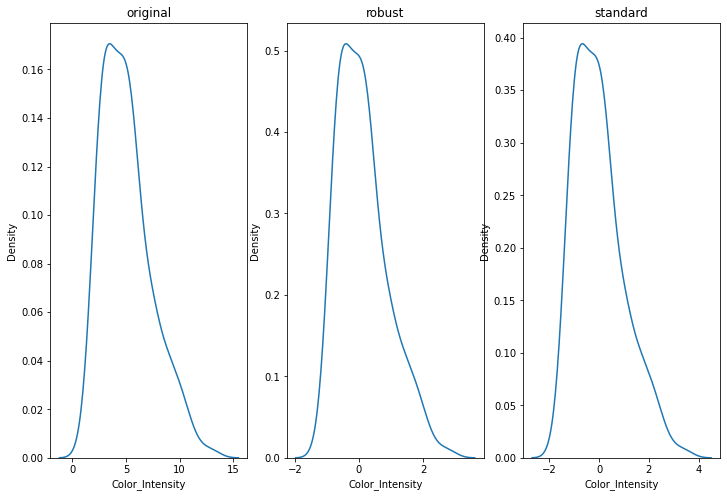

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('original')
sns.kdeplot(data=df, x='Color_Intensity')
plt.subplot(132)
plt.title('robust')
sns.kdeplot(data=rb_df, x='Color_Intensity')
plt.subplot(133)
plt.title('standard')
sns.kdeplot(data=st_df2, x='Color_Intensity')

In [ ]:
rb_df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0309,-0.0376,0.3185,0.0188,-0.0012,0.0917,-0.0566,-0.0633,0.1305,0.0513,0.1235,-0.0224,-0.1366,0.1515
std,0.3875,0.6174,0.7548,0.7895,0.7766,0.7517,0.5918,0.5981,0.7430,0.8177,0.7779,0.6772,0.5761,0.6500
min,-0.5000,-1.5361,-0.7601,-2.8777,-2.0698,-1.4737,-1.3002,-1.0749,-1.2537,-1.6357,-1.1443,-1.4370,-1.2252,-0.8163
25%,-0.5000,-0.5228,-0.1774,-0.4317,-0.5349,-0.5263,-0.5792,-0.5569,-0.4179,-0.4357,-0.4933,-0.5407,-0.6836,-0.3571
50%,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.5000,0.4772,0.8226,0.5683,0.4651,0.4737,0.4208,0.4431,0.5821,0.5643,0.5067,0.4593,0.3164,0.6429
max,0.5000,1.3536,2.6588,2.5036,2.4419,3.3684,1.4421,1.7635,1.9104,2.8929,2.7886,2.2074,0.9899,2.0774


#### 최소-최대 스케일링
> 최솟값, 최댓값을 사용하여 스케일링, 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨

$x_i-min(x)\over max(x)-min(x)$

* $x_i$ : 변수의 i번째 값
* $min(x)$ : 최솟값
* $max(x)$ : 최댓값

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df)
mm_df = pd.DataFrame(mm_scaled, columns=df.columns)
mm_df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,0.4691,0.5186,0.3155,0.5382,0.4585,0.3233,0.4535,0.3564,0.4375,0.3725,0.3224,0.3882,0.4915,0.3344
std,0.3875,0.2136,0.2208,0.1467,0.1721,0.1552,0.2158,0.2107,0.2348,0.1806,0.1978,0.1858,0.2601,0.2246
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.3507,0.1705,0.4545,0.3402,0.1957,0.2629,0.1825,0.2642,0.2650,0.1655,0.2459,0.2445,0.1587
50%,0.5000,0.5316,0.2223,0.5348,0.4588,0.3043,0.4741,0.3787,0.3962,0.3612,0.2910,0.3943,0.5531,0.2821
75%,1.0000,0.6967,0.4629,0.6404,0.5619,0.4022,0.6276,0.5348,0.5802,0.4858,0.4198,0.5203,0.6960,0.5043
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 스케일링 방식 선택 기준
* 아웃라이어(이상치)의 유무 : 아웃라이어 영향이 클 시 로버스트 스케일링이 적합 (4분위값 이용)
* 데이터의 기존 분포를 최대한 유지해야할 시 : 최소-최대 스케일링
* 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : 표준화 스케일링

#### 스케일링별 특징
|구분|결과물의 특징|
|-|-|
|표준화 스케일링|아웃라이어의 영향을 받음.<br>평균 0, 분산 1이 되게끔 분포시키기 때문에, **데이터의 기존 분포 형태가 사라지고** 정규분포를 따르는 결과물을 가져 옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때,<br> **아웃라이어의 영향을 받지 않음**.<br>변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|아웃라이어의 영향을 받음.<br>위의 두 스케일러와 비교했을 때, **데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화**시킴.<br>데이터의 범위는 0~1로 나타남|

#### 스케일링 적용 시 주의점
* 스케일링 대상에서 종속변수를 제외
* 스케일링 전 훈련셋과 시험셋을 구분

In [ ]:
df.Class.value_counts() / len(df.Class) * 100

2   39.8876
1   33.1461
3   26.9663
Name: Class, dtype: float64

In [ ]:
# 종속변수 (y) / 독립변수들 (x)
# 훈련셋과 시험셋 구분 (train, test) => 스케일링
# X_test 스케일링은 어떻게 해요?
from sklearn.model_selection import train_test_split # 훈련셋/시험셋

# Class
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1), # X(독립변수)
    df.Class, test_size=0.2, random_state=21,
    stratify=df.Class # 2, 1, 3 균질하지 않음 49:51? 39:33:26
)

In [ ]:
y_train.value_counts() / len(y_train) * 100

2   40.1408
1   33.0986
3   26.7606
Name: Class, dtype: float64

In [ ]:
y_test.value_counts() / len(y_test) * 100

2   38.8889
1   33.3333
3   27.7778
Name: Class, dtype: float64

In [ ]:
X_train.head() # 스케일링 대상

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
80,12.0000,0.9200,2.0000,19.0000,86,2.4200,2.2600,0.3000,1.4300,2.5000,1.3800,3.1200,278
27,13.3000,1.7200,2.1400,17.0000,94,2.4000,2.1900,0.2700,1.3500,3.9500,1.0200,2.7700,1285
85,12.6700,0.9800,2.2400,18.0000,99,2.2000,1.9400,0.3000,1.4600,2.6200,1.2300,3.1600,450
29,14.0200,1.6800,2.2100,16.0000,96,2.6500,2.3300,0.2600,1.9800,4.7000,1.0400,3.5900,1035
77,11.8400,2.8900,2.2300,18.0000,112,1.7200,1.3200,0.4300,0.9500,2.6500,0.9600,2.5200,500


In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_train_scaled

array([[0.26075269, 0.03557312, 0.19607843, ..., 0.73170732, 0.67765568,
        0.        ],
       [0.61021505, 0.19367589, 0.2875817 , ..., 0.43902439, 0.54945055,
        0.71825963],
       [0.44086022, 0.04743083, 0.35294118, ..., 0.6097561 , 0.69230769,
        0.12268188],
       ...,
       [0.54301075, 0.25889328, 0.99346405, ..., 0.52845528, 0.70695971,
        0.39372325],
       [0.32795699, 0.19565217, 0.2745098 , ..., 0.42276423, 0.6959707 ,
        0.16547789],
       [0.33870968, 0.13241107, 0.18300654, ..., 0.6097561 , 0.53846154,
        0.10699001]])

In [ ]:
mm_scaler.data_max_, mm_scaler.data_min_, mm_scaler.data_range_, mm_scaler.feature_names_in_

(array([1.475e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
        5.080e+00, 6.600e-01, 3.580e+00, 1.175e+01, 1.710e+00, 4.000e+00,
        1.680e+03]),
 array([1.103e+01, 7.400e-01, 1.700e+00, 1.120e+01, 7.800e+01, 1.100e+00,
        4.700e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01, 1.270e+00,
        2.780e+02]),
 array([3.720e+00, 5.060e+00, 1.530e+00, 1.880e+01, 8.400e+01, 2.780e+00,
        4.610e+00, 5.300e-01, 3.170e+00, 1.047e+01, 1.230e+00, 2.730e+00,
        1.402e+03]),
 array(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
        'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
        'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
       dtype=object))

In [ ]:
# scaler의 fit 자체는 train 데이터로만 진행을 하는데
# model을 사용해서 pred. => test 데이터는 이미 학습된 scaler를 사용한다
X_test_scaled = mm_scaler.transform(X_test)
X_test_scaled

array([[ 0.19623656,  0.38339921,  0.79738562,  0.46808511,  0.29761905,
         0.23381295,  0.33839479,  0.88679245,  0.20189274,  0.24068768,
         0.6097561 ,  0.45054945,  0.23466476],
       [ 0.76612903,  0.84980237,  0.34640523,  0.46808511,  0.02380952,
        -0.04316547, -0.02819957,  0.50943396,  0.0851735 ,  0.34574976,
         0.08130081,  0.02197802,  0.09771755],
       [ 0.44623656,  0.15612648,  0.36601307,  0.50531915,  0.02380952,
         0.10071942,  0.21475054,  0.8490566 ,  0.38170347,  0.16905444,
         0.3902439 ,  0.28937729,  0.15477889],
       [ 0.36021505,  0.06521739,  0.26143791,  0.38829787,  0.11904762,
         0.8705036 ,  0.71149675,  0.20754717,  0.48580442,  0.30754537,
         0.45528455,  0.54945055,  0.2724679 ],
       [ 0.21774194,  0.02964427,  0.5751634 ,  0.36170213,  0.19047619,
         0.39568345,  0.37744035,  0.16981132,  0.61198738,  0.16905444,
         0.25203252,  0.66300366,  0.17261056],
       [ 0.59408602,  0.365612

# 모델링 & 예측/평가 

In [ ]:
# from sklearn.linear_model...
# 이미 정의된 모델 알고리즘을 SKlearn 혹은 다른 알고리즘 패키지
from sklearn.neighbors import KNeighborsClassifier # 분류 문제 풀 때 (범주형 변수)
# from sklearn.neighbors import KNeighborsRegressor -> 회귀 문제 풀 때 (연속형 변수 풀 때)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train) # 지도학습 : 관측값->예측값 독립변수->종속변수
y_pred = knn.predict(X_test_scaled)
y_pred

array([2, 3, 2, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 3])

In [ ]:
knn.predict_proba(X_test_scaled) # knn -> k => 5개를 비교했을 때(default)

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.2, 0.8, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.8, 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [ ]:
y_pred

array([2, 3, 2, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 3])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) # 실제값y_test와 모델을 통한 예측값 y_pred간의 일치 정도

0.9722222222222222

# 하이퍼파라미터 튜닝
`KNeighborsClassifier` : 분류 문제 해결 시 사용하는 클래스<br>
`KNeighborsRegressor` : 회귀 문제 해결 시 사용하는 클래스
```
(class) KNeighborsClassifier(
    n_neighbors: int = 5, *,
    weights: str = "uniform",
    algorithm: str = "auto",
    leaf_size: int = 30,
    p: int = 2,
    metric: str = "minkowski",
    metric_params: Any | None = None,
    n_jobs: Any | None = None)
```
* n_neighbors : 예측에 참고할 이웃 수 (5개)
* weights : 예측에 사용되는 가중치 함수 - 기본값 : uniform - 모든 점에 동일한 가중치 부여
* metric : 거리 측정 기준 (minkowski)
* n_jobs : 실행할 병렬 작업 수

In [ ]:
def tuning(n: int):
    '''
    n을 받아서 해당 값으로 KNN 모델을 하이퍼 패러미터 변경
    '''
    knn = KNeighborsClassifier(n_neighbors=n) # n의 값을 넣으면 해당 n을 knn의 근접 이웃수 판단 기준으로 사용하는 모델이 만들어짐
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, pred)
    return score

In [ ]:
tuning(7)

0.9444444444444444

In [ ]:
for i in range(1, 21):
    print(i, tuning(i))

1 0.9722222222222222
2 0.9722222222222222
3 0.9722222222222222
4 0.9444444444444444
5 0.9722222222222222
6 0.9444444444444444
7 0.9444444444444444
8 0.9444444444444444
9 0.9722222222222222
10 0.9722222222222222
11 0.9722222222222222
12 0.9722222222222222
13 0.9722222222222222
14 0.9722222222222222
15 0.9722222222222222
16 0.9722222222222222
17 0.9722222222222222
18 0.9722222222222222
19 0.9722222222222222
20 0.9722222222222222


In [ ]:
scores = [(i, tuning(i)) for i in range(1, 21)]
scores

[(1, 0.9722222222222222),
 (2, 0.9722222222222222),
 (3, 0.9722222222222222),
 (4, 0.9444444444444444),
 (5, 0.9722222222222222),
 (6, 0.9444444444444444),
 (7, 0.9444444444444444),
 (8, 0.9444444444444444),
 (9, 0.9722222222222222),
 (10, 0.9722222222222222),
 (11, 0.9722222222222222),
 (12, 0.9722222222222222),
 (13, 0.9722222222222222),
 (14, 0.9722222222222222),
 (15, 0.9722222222222222),
 (16, 0.9722222222222222),
 (17, 0.9722222222222222),
 (18, 0.9722222222222222),
 (19, 0.9722222222222222),
 (20, 0.9722222222222222)]

In [ ]:
sorted(scores, key=lambda x: x[1], reverse=True) # 내림차순

[(1, 0.9722222222222222),
 (2, 0.9722222222222222),
 (3, 0.9722222222222222),
 (5, 0.9722222222222222),
 (9, 0.9722222222222222),
 (10, 0.9722222222222222),
 (11, 0.9722222222222222),
 (12, 0.9722222222222222),
 (13, 0.9722222222222222),
 (14, 0.9722222222222222),
 (15, 0.9722222222222222),
 (16, 0.9722222222222222),
 (17, 0.9722222222222222),
 (18, 0.9722222222222222),
 (19, 0.9722222222222222),
 (20, 0.9722222222222222),
 (4, 0.9444444444444444),
 (6, 0.9444444444444444),
 (7, 0.9444444444444444),
 (8, 0.9444444444444444)]

# 알고리즘 이해
* KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류
* 변수의 스케일 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음
* 거리가 동점일 경우
  * 사이킷런 : 랜덤으로 분류함
  * n을 홀수로 하면 동점을 근본적으로 막을 수 있음
  * 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌

# 연습
* 타이타닉 데이터를 통해 KNN을 사용해보기
  * 전처리까지 끝난 df를 -> to_csv로 저장한 다음에 새로운 노트북에 하면 깔끔 (google.colab -> files)
* 스케일러(표준화,로버스트,최소-최대)별 결과 비교 (정확도)
  * model.predict() <- 전처리하는 과정을 함수화 해서 score 비교
  * distplot? -> 분포 모양
* 와인등급 또는 타이타닉 데이터 사용해서 Streamlit 시각화
  * scaler -> pkl
  * EDA -> 데이터 분석이나 시각화
  * kaggle, dacon 분류 문제 찾아서 도전

In [ ]:
!pip install mlxtend -q

In [ ]:
import joblib

# mm_scaler
joblib.dump(mm_scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
saved_scaler = joblib.load('scaler.pkl')

In [ ]:
saved_scaler # fit으로 학습시킨 데이터가 안에 내장
# saved_scaler.transform(새로운 데이터)

MinMaxScaler()